# Library

In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [7]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import feat_imp
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

In [8]:
df = pd.read_csv(f"E:/gitlab/machine-learning/dataset/Modal_Antar.csv")

In [9]:
df

,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan,kat_status
0,44,1,7,7,10046300,4,4,5,1000000,1.0,1
1,44,1,7,7,10290000,3,6,1,1000000,1.0,1
2,28,1,5,7,5327891,2,4,2,1000000,1.0,1
3,40,1,7,9,7150000,3,4,1,1000000,1.0,1
4,41,1,3,7,5150000,3,5,1,1000000,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
128,50,1,3,9,5500000,2,4,1,1000000,1.0,1
129,56,1,7,9,2250000,4,2,1,1000000,1.0,1
130,26,2,5,7,4678138,2,4,1,3000000,6.0,1
131,30,1,3,9,5200000,2,4,1,1000000,1.0,1


# feature importance 

In [11]:
fs = feat_imp(data = df.drop("kat_status" ,1), labels = df["kat_status"])

# find missing value

In [12]:
fs.identify_missing(missing_threshold=0.6)

0 features with greater than 0.60 missing values.



In [15]:
missing_features = fs.ops['missing']

In [16]:
missing_features

[]

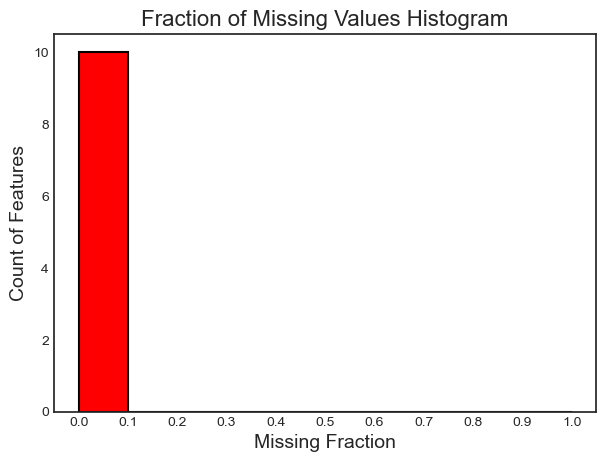

In [17]:
fs.plot_missing()

In [18]:
fs.missing_stats

,missing_fraction
usia,0.0
pengambilan_kredit,0.0
pengalaman_kerja,0.0
jabatan_id,0.0
pendapatan,0.0
jumlah_tanggungan,0.0
pendidikan,0.0
kepemilikan,0.0
pinjaman,0.0
tenor_bulanan,0.0


# find unique value

In [13]:
fs.identify_single_unique()

0 features with a single unique value.



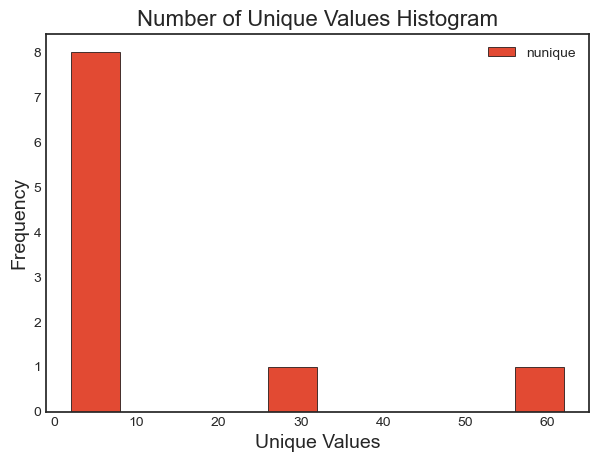

In [19]:
fs.plot_unique()

In [20]:
single_unique = fs.ops['single_unique']

In [21]:
single_unique

[]

In [22]:
fs.unique_stats

,nunique
pengambilan_kredit,2
tenor_bulanan,2
kepemilikan,4
pinjaman,4
jumlah_tanggungan,5
pengalaman_kerja,6
jabatan_id,6
pendidikan,6
usia,30
pendapatan,62


# find collinear value 

In [14]:
fs.identify_collinear(0.75, one_hot=False)

1 features with a correlation magnitude greater than 0.75.



In [23]:
correlated_features = fs.ops['collinear']

In [24]:
correlated_features

['tenor_bulanan']

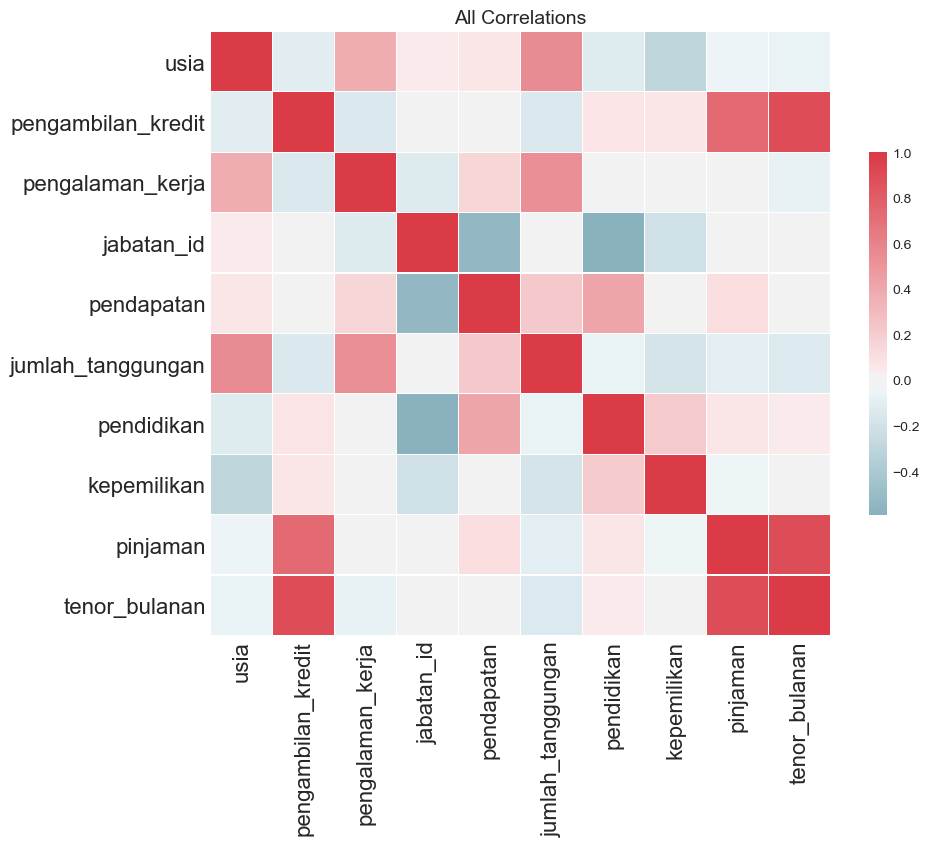

In [25]:
fs.plot_collinear(plot_all=True)

In [26]:
fs.record_collinear

,drop_feature,corr_feature,corr_value
0,tenor_bulanan,pengambilan_kredit,0.900289
1,tenor_bulanan,pinjaman,0.889696


# find zero_importance value

In [73]:
fs.identify_zero_importance(task = 'classification', type='lgb',eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.973684	valid_0's binary_logloss: 0.140607
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.394737	valid_0's binary_logloss: 0.20181
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 1	valid_0's binary_logloss: 0.167184
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.947368	valid_0's binary_logloss: 0.178761
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 1	valid_0's binary_logloss: 0.177868
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[80]	valid_0's auc: 1	valid_0's binary_logloss: 0.0791457
Training until validation

In [69]:
fs.identify_zero_importance(task = 'classification', type='all',eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = False)

Training Gradient Boosting Model



,features,value_lgb,cumulative_value_lgb,value_ada,cumulative_value_ada,value_dt,cumulative_value_dt,value_rf,cumulative_value_rf,value_gbc,cumulative_value_gbc,value_xgb,cumulative_value_xgb
1,pengambilan_kredit,0.011183,0.301951,0.000,0.120,0.137085,0.17381,0.051387,0.120616,0.067597,0.075425,0.115874,0.140734
2,pengalaman_kerja,0.123277,0.425228,0.050,0.170,0.000000,0.17381,0.052913,0.173529,0.000001,0.075426,0.014894,0.155629
5,jumlah_tanggungan,0.072822,0.802601,0.000,0.713,0.000000,0.38225,0.035316,0.530358,0.000000,0.339155,0.032291,0.419816
6,pendidikan,0.004941,0.807542,0.037,0.750,0.000000,0.38225,0.017857,0.548216,0.000003,0.339157,0.000000,0.419816
9,tenor_bulanan,0.020286,1.000000,0.009,1.000,0.075397,1.00000,0.075443,1.000000,0.089327,1.000000,0.000000,1.000000



5 features with zero importance after one-hot encoding.



,features,value_lgb,cumulative_value_lgb,value_ada,cumulative_value_ada,value_dt,cumulative_value_dt,value_rf,cumulative_value_rf,value_gbc,cumulative_value_gbc,value_xgb,cumulative_value_xgb
0,usia,0.290767,0.290767,0.120,0.120,0.036724,0.036724,0.069229,0.069229,0.007828,0.007828,0.024860,0.024860
1,pengambilan_kredit,0.011183,0.301951,0.000,0.120,0.137085,0.173810,0.051387,0.120616,0.067597,0.075425,0.115874,0.140734
2,pengalaman_kerja,0.123277,0.425228,0.050,0.170,0.000000,0.173810,0.052913,0.173529,0.000001,0.075426,0.014894,0.155629
3,jabatan_id,0.071521,0.496749,0.141,0.311,0.075397,0.249206,0.074416,0.247945,0.056859,0.132286,0.204048,0.359677
4,pendapatan,0.233030,0.729779,0.402,0.713,0.133043,0.382250,0.247097,0.495042,0.206869,0.339155,0.027848,0.387525
5,jumlah_tanggungan,0.072822,0.802601,0.000,0.713,0.000000,0.382250,0.035316,0.530358,0.000000,0.339155,0.032291,0.419816
6,pendidikan,0.004941,0.807542,0.037,0.750,0.000000,0.382250,0.017857,0.548216,0.000003,0.339157,0.000000,0.419816
7,kepemilikan,0.120416,0.927958,0.132,0.882,0.069581,0.451831,0.065155,0.613371,0.070263,0.409420,0.059409,0.479226
8,pinjaman,0.051756,0.979714,0.109,0.991,0.472772,0.924603,0.311187,0.924557,0.501253,0.910673,0.520774,1.000000
9,tenor_bulanan,0.020286,1.000000,0.009,1.000,0.075397,1.000000,0.075443,1.000000,0.089327,1.000000,0.000000,1.000000


In [70]:
base_features = fs.base_features
one_hot_features = fs.one_hot_features
print('There are %d original features' % len(base_features))
print('There are %d one-hot features' % len(one_hot_features))

There are 10 original features
There are 0 one-hot features


In [71]:
zero_importance_features = fs.ops['zero_importance']
zero_importance_features

['pengambilan_kredit',
 'pengalaman_kerja',
 'jumlah_tanggungan',
 'pendidikan',
 'tenor_bulanan']

# all data

In [29]:
fs.data_all

,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan
0,44,1,7,7,10046300,4,4,5,1000000,1.0
1,44,1,7,7,10290000,3,6,1,1000000,1.0
2,28,1,5,7,5327891,2,4,2,1000000,1.0
3,40,1,7,9,7150000,3,4,1,1000000,1.0
4,41,1,3,7,5150000,3,5,1,1000000,1.0
...,...,...,...,...,...,...,...,...,...,...
128,50,1,3,9,5500000,2,4,1,1000000,1.0
129,56,1,7,9,2250000,4,2,1,1000000,1.0
130,26,2,5,7,4678138,2,4,1,3000000,6.0
131,30,1,3,9,5200000,2,4,1,1000000,1.0


# feature_importances

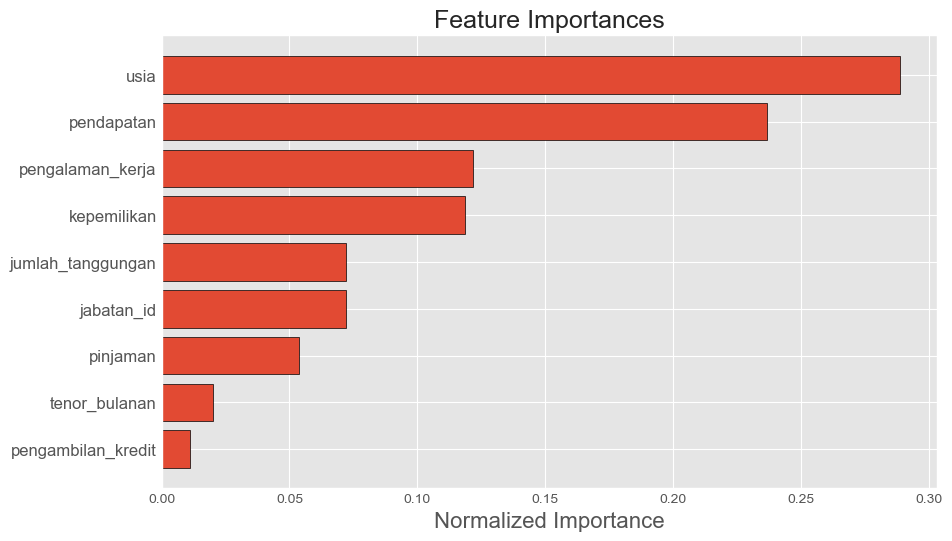

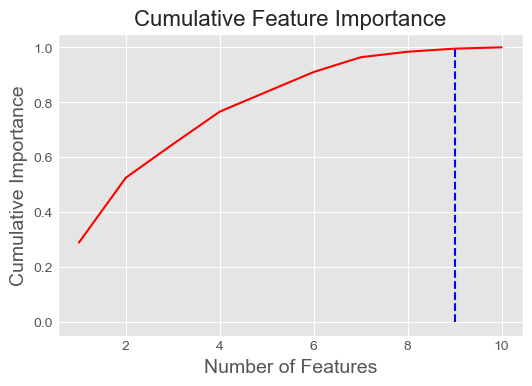

9 features required for 0.99 of cumulative importance


In [74]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

In [75]:
fs.feature_importances

,feature,importance,normalized_importance,cumulative_importance
0,usia,1125.4,0.288660,0.288660
1,pendapatan,922.4,0.236592,0.525252
2,pengalaman_kerja,475.1,0.121861,0.647113
3,kepemilikan,463.1,0.118783,0.765896
4,jumlah_tanggungan,281.9,0.072306,0.838202
5,jabatan_id,280.5,0.071947,0.910150
6,pinjaman,209.5,0.053736,0.963885
7,tenor_bulanan,78.0,0.020007,0.983892
8,pengambilan_kredit,43.8,0.011235,0.995127
9,pendidikan,19.0,0.004873,1.000000


In [76]:
one_hundred_features = list(fs.feature_importances.loc[:99, 'feature'])
one_hundred_features

['usia',
 'pendapatan',
 'pengalaman_kerja',
 'kepemilikan',
 'jumlah_tanggungan',
 'jabatan_id',
 'pinjaman',
 'tenor_bulanan',
 'pengambilan_kredit',
 'pendidikan']

# identify_low_importance

In [77]:
fs.identify_low_importance(cumulative_importance = 0.99)

8 features required for cumulative importance of 0.99 after one hot encoding.
2 features do not contribute to cumulative importance of 0.99.



In [78]:
low_importance_features = fs.ops['low_importance']
low_importance_features

['pengambilan_kredit', 'pendidikan']

In [79]:
train_no_missing = fs.remove(methods = ['missing', 'zero_importance'])
train_no_missing

Removed 0 features.


,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan
0,44,1,7,7,10046300,4,4,5,1000000,1.0
1,44,1,7,7,10290000,3,6,1,1000000,1.0
2,28,1,5,7,5327891,2,4,2,1000000,1.0
3,40,1,7,9,7150000,3,4,1,1000000,1.0
4,41,1,3,7,5150000,3,5,1,1000000,1.0
...,...,...,...,...,...,...,...,...,...,...
128,50,1,3,9,5500000,2,4,1,1000000,1.0
129,56,1,7,9,2250000,4,2,1,1000000,1.0
130,26,2,5,7,4678138,2,4,1,3000000,6.0
131,30,1,3,9,5200000,2,4,1,1000000,1.0


In [80]:
all_to_remove = fs.check_removal()

Total of 3 features identified for removal


In [81]:
train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)
train_removed_all

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 3 features including one-hot features.


,usia,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,kepemilikan,pinjaman
0,44,7,7,10046300,4,5,1000000
1,44,7,7,10290000,3,1,1000000
2,28,5,7,5327891,2,2,1000000
3,40,7,9,7150000,3,1,1000000
4,41,3,7,5150000,3,1,1000000
...,...,...,...,...,...,...,...
128,50,3,9,5500000,2,1,1000000
129,56,7,9,2250000,4,1,1000000
130,26,5,7,4678138,2,1,3000000
131,30,3,9,5200000,2,1,1000000
